# The purpose of this project is to create a machine learning model to predict a person's chance of a heart attack. 

In [55]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

In [78]:
# Import data from https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
heart_df = pd.read_csv('heart.csv')
header = ['Saturation Level']
#saturation_df = pd.read_csv('Saturation.csv', names = header)

# Column details

## Categorical 
* sex - Gender of person
* cp - Chest pain type
* caa - number of major vessels (0-3)

* fbs - fasting blood sugar (fbs > 120 mg/dl) (1 = true, 0 = false)
* restecg - resting electrocardiographic results 

    (0:normal, 1:ST-T wave abnormality, 2:showing probable or definite left ventricular hypertrophy by Estes' criteria)

* exng - exercise induced angina (1= yes, 0 = no)
* slp - slope
* thall - thal rate

## Continuous 

* trtbps - Resting blood pressure (mm Hg)
* chol - cholesterol in mg/dl fetched via BMI sensor
    (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
    
* Age - Age of person
* thalachh - maximum heart rate achieved
* oldpeak - previous peak



## Target
* output - target variable (0 = less chance of heart attack, 1 = more chance of heart attack)

In [3]:
# Lists of categorical and continuous columns
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

In [4]:
heart_df = heart_df.copy()

In [5]:
# Encode categorical columns
heart_df = pd.get_dummies(heart_df, columns = cat_cols, drop_first=True)

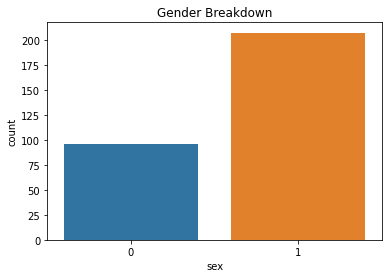

In [59]:
# Gender Breakdown Countplot
sns.countplot(data = heart_df, x = 'sex')
plt.title('Gender Breakdown')
plt.show()

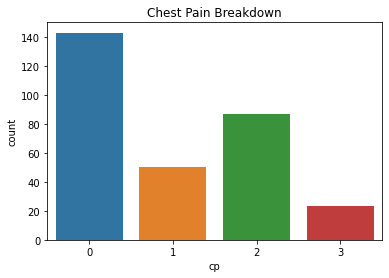

In [61]:
# Chest Pain Breakdown

sns.countplot(data = heart_df, x= 'cp')
plt.title('Chest Pain Breakdown')
plt.show()

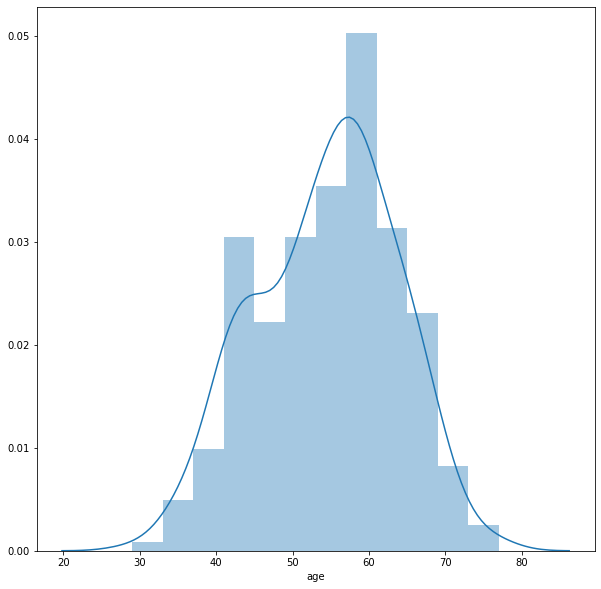

In [68]:
plt.figure(figsize=(10,10))
sns.distplot(heart_df.age,label = 'Age',kde = True)
plt.show()

In [6]:
# Train test split
from sklearn.model_selection import train_test_split

X = heart_df.drop(['output'],axis = 1).copy()
y = heart_df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Naive Bayes Model attempt
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7868852459016393


In [8]:
# Random Forest Model attempt
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=1000,random_state = 40)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8360655737704918


In [9]:
# Decision Tree Attempt

from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(random_state = 40)
DTC.fit(X_train,y_train)
y_pred = DTC.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7540983606557377


In [10]:
# Logistic Regression Attempt

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state= 0,max_iter= 50000).fit(X_train,y_train)
y_pred = LR.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9016393442622951


In [11]:
# our initial run has the Naive Bayes Model performing the best with 84% accuracy

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Naive Bayes Pipeline

model = make_pipeline(GaussianNB())
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test,pred))

Accuracy: 0.7868852459016393


In [13]:
# See what paramaters we can adjust
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'gaussiannb', 'gaussiannb__priors', 'gaussiannb__var_smoothing'])

In [42]:
# Logistic Regression Pipeline

model = make_pipeline(RobustScaler(),LogisticRegression())
model.fit(X_train, y_train)
pred_proba = model.predict_proba(X_test)
y_pred = np.argmax(pred_proba, axis = 1)

print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9016393442622951


In [43]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'robustscaler', 'logisticregression', 'robustscaler__copy', 'robustscaler__quantile_range', 'robustscaler__unit_variance', 'robustscaler__with_centering', 'robustscaler__with_scaling', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [44]:
from sklearn.model_selection import GridSearchCV

Cs = [0.001,0.01,0.1,1,10,100,1000]
logisticregression__penalty = ['l1','l2','none']
logisticregression__solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

parameters = {'logisticregression__C': Cs,'logisticregression__penalty': logisticregression__penalty,'logisticregression__solver': logisticregression__solver}

clf1 = GridSearchCV(model, parameters, scoring = 'accuracy', cv = 3, n_jobs = -1).fit(X_train,y_train)




/Users/nickseah/Desktop/PythonAddOns/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.45041152        nan 0.54958848 0.54958848
 0.54958848 0.80180041 0.54958848 0.54958848 0.76893004 0.76893004
        nan 0.78539095 0.79367284        nan        nan 0.45041152
        nan 0.54958848 0.78518519 0.78518519 0.82649177 0.78518519
 0.78518519 0.76893004 0.76893004        nan 0.78539095 0.79367284
        nan        nan 0.76023663        nan 0.74377572 0.81414609
 0.81414609 0.81414609 0.81414609 0.81414609 0.76893004 0.76893004
        nan 0.78539095 0.79367284        nan        nan 0.79768519
        nan 0.78122428 0.78940329 0.78940329 0.79763374 0.78940329
 0.78940329 0.76893004 0.76893004        nan 0.78539095 0.79367284
        nan        nan 0.79367284        nan 0.79367284 0.7936214
 0.7936214  0.7936214  0.7936214  0.78950617 0.76893004 0.76893004
        nan 0.78539095

In [45]:
clf1.best_params_

{'logisticregression__C': 0.01,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [46]:
clf1.best_estimator_

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, solver='liblinear'))])

In [70]:
# Logistic Regression Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[27,  2],
       [ 4, 28]])

In [47]:
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import itertools
from sklearn.metrics import f1_score

def ROC(label,result):
    # Compute ROC curve and area the curve
    Y = np.array(label)
    fpr, tpr, thresholds = roc_curve(Y, result)
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)

    # Plot ROC curve
    #pl.clf()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()


# Logistic Regression ROC curve

Area under the ROC curve : 0.939655


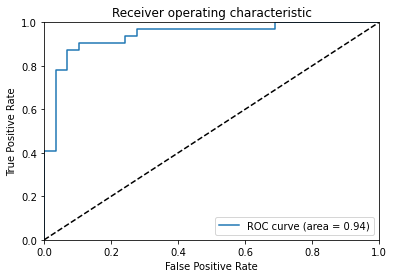

In [48]:
model.fit(X_train,y_train)
y_score = model.predict_proba(X_test)[:,1]
ROC(y_test,y_score)

# Logistic Regression 2 Class Precision Recall Curve

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.95')

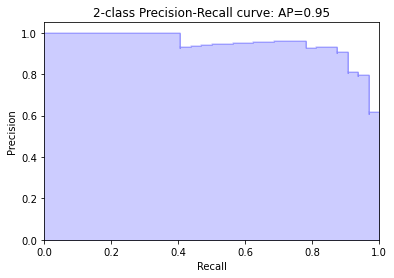

In [50]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

import matplotlib.pyplot as plt

average_precision = average_precision_score(y_test, y_score)

precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))


# Using a Logistic Regression Model we were able to achieve a model with 90% Accuracy! This model could be improved by incorporating the O2 Saturation data, it had no relation to the heart dataframe so it was unusable. We could also try building a neural network with 2 output layers!